In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('palm.csv')
df_w = pd.read_csv('palm_watering.csv')

In [32]:
df['last_watered'] = df['time_stamp'].apply(lambda x: df_w[df_w['time_stamp'] < x]['time_stamp'].iloc[-1] if len(df_w[df_w['time_stamp'] < x]) > 0 else None)

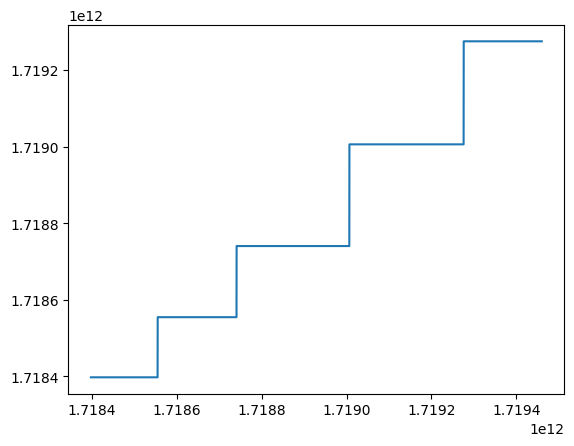

In [18]:
plt.plot(df['time_stamp'], df['last_watered'])

In [33]:

# for each 'last_watered' group, remove all the entries before the max soil_moisture_1 of all those 'last_watered' rows, and also 
# remove all entries after the min soil_moisture_1 of all those 'last_watered' rows
last_min_moisture = None

filtered_groups = []
for name, group in df.groupby('last_watered'):
    max_moisture_index = group['soil_moisture_1'].idxmax()
    min_moisture_index = group['soil_moisture_1'].idxmin()

    print((max_moisture_index, min_moisture_index))
        # Ensure the max comes before the min
    if max_moisture_index > min_moisture_index:
        print(f"Skipping group {name} because max moisture comes after min moisture")
        continue  # Skip this group if max moisture comes after min moisture

    filtered_group = group.loc[max_moisture_index:min_moisture_index]
    
    # Append the filtered group to the list
    filtered_groups.append(filtered_group)

df_filtered = pd.concat(filtered_groups)


(np.int64(5758), np.int64(5742))
Skipping group 1718397768748.0 because max moisture comes after min moisture
(np.int64(5760), np.int64(9135))
(np.int64(9140), np.int64(10091))
(np.int64(10095), np.int64(14872))
(np.int64(14978), np.int64(18247))


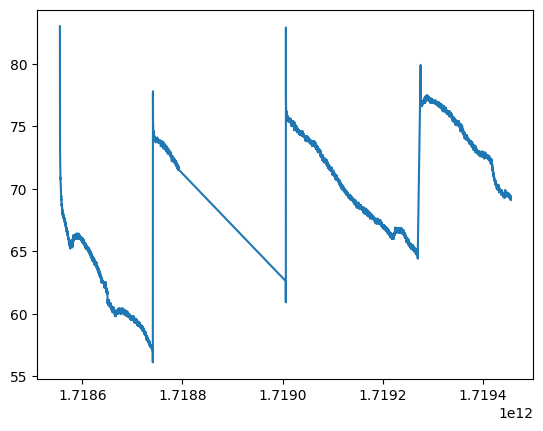

In [34]:
plt.plot(df_filtered['time_stamp'], df_filtered['soil_moisture_1'])

In [ ]:

    # put the peak moisture, and moisture before watering in for each group
    df.loc[group[group['soil_moisture_1'] == max_soil_moisture_1].index[0], 'peak_moisture'] = max_soil_moisture_1
    df.loc[group[group['soil_moisture_1'] == max_soil_moisture_1].index[0], 'time_peak'] = group[group['soil_moisture_1'] == max_soil_moisture_1]['time_stamp'].iloc[0]
    if last_min_moisture is not None:
        df.loc[group[group['soil_moisture_1'] == max_soil_moisture_1].index[0], 'moisture_before_watering'] = last_min_moisture
    last_min_moisture = min_soil_moisture_1

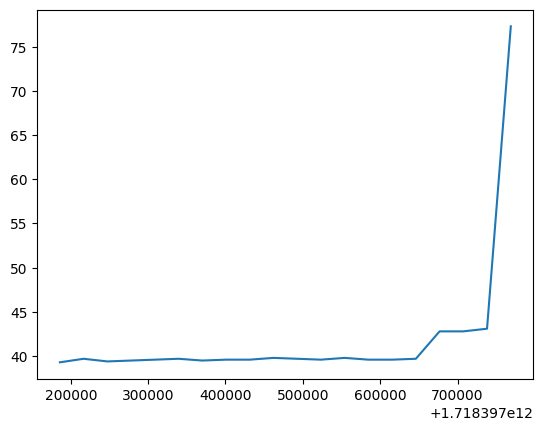

In [24]:
# plot the new data
plt.plot(df['time_stamp'], df['soil_moisture_1'], label='soil_moisture_1')

In [25]:
df

,soil_temp,ext_temp,light,soil_moisture_1,soil_moisture_2,humidity,time_stamp,last_watered
0,NaN,21.609905,50.250474,39.3,NaN,51.580190,1718397185960,NaN
1,NaN,21.609905,50.250474,39.3,NaN,51.580190,1718397185960,NaN
2,NaN,21.509886,50.300000,39.7,NaN,51.960458,1718397216621,NaN
3,NaN,21.509886,50.300000,39.7,NaN,51.960458,1718397216621,NaN
4,NaN,21.500000,49.218665,39.4,NaN,51.639555,1718397247281,NaN
5,NaN,21.500000,49.218665,39.4,NaN,51.639555,1718397247281,NaN
6,NaN,21.409516,48.919033,39.5,NaN,51.057098,1718397278001,NaN
7,NaN,21.409516,48.919033,39.5,NaN,51.057098,1718397278001,NaN
8,NaN,21.309295,48.718591,39.6,NaN,50.546477,1718397308723,NaN
9,NaN,21.309295,48.718591,39.6,NaN,50.546477,1718397308723,NaN
